In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Splitting the Data

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    )

In [ ]:
train_data = train_datagen.flow_from_directory(directory='/content/drive/My Drive/Colab Notebooks/Projects/Kaggle-guns', 
                                               target_size=(224, 224), 
                                               class_mode='binary',
                                              #  color_mode='rgba',
                                               batch_size=32, 
                                               subset='training',
                                               shuffle=True )

Found 4769 images belonging to 2 classes.


In [ ]:
np.sum([train_data.classes == 0])

2369

In [ ]:
np.sum([train_data.classes == 1])

2400

In [ ]:
train_data.class_indices

{'GV': 0, 'NGV': 1}

In [ ]:
train_data[76][0].shape

(32, 224, 224, 3)

In [ ]:
train_data.data_format

'channels_last'

In [ ]:
train_data[0][0].shape

(32, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


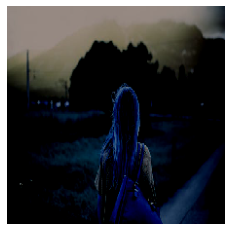

In [ ]:
plt.imshow(train_data[100][0][17])
plt.axis("off");

In [ ]:
validation_data = train_datagen.flow_from_directory(directory='/content/drive/My Drive/Colab Notebooks/Projects/Kaggle-guns', 
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    # color_mode='rgba',
                                                    subset='validation',
                                                    shuffle=True)

Found 1191 images belonging to 2 classes.


In [ ]:
np.sum([validation_data.classes == 0])

592

In [ ]:
np.sum([validation_data.classes == 1])

599

# VGG Model

In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras import Model

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer


58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
flat1 = Flatten()(base_model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
drop = tf.keras.layers.Dropout(0.5)(class1)
output = Dense(1, activation='sigmoid')(drop)
# define new model
model = Model(inputs=base_model.inputs, outputs=output)
# summarize
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
!pip install h5py

In [ ]:
model.fit(
    train_data,
    steps_per_epoch = train_data.samples // 32,
    validation_data = validation_data, 
    validation_steps = validation_data.samples // 32,
    epochs = 15
    )

Epoch 1/15
149/149 [==============================] - 2433s 16s/step - loss: 3.6833 - accuracy: 0.5214 - auc: 0.4916 - precision: 0.4911 - recall: 0.4504 - val_loss: 0.6789 - val_accuracy: 0.5726 - val_auc: 0.5468 - val_precision: 0.5297 - val_recall: 0.5718
Epoch 2/15
149/149 [==============================] - 133s 892ms/step - loss: 0.6013 - accuracy: 0.6770 - auc: 0.5978 - precision: 0.5577 - recall: 0.6385 - val_loss: 0.5710 - val_accuracy: 0.6486 - val_auc: 0.6619 - val_precision: 0.5891 - val_recall: 0.6801
Epoch 3/15
149/149 [==============================] - 133s 890ms/step - loss: 0.3811 - accuracy: 0.8182 - auc: 0.7135 - precision: 0.6186 - recall: 0.7104 - val_loss: 4.8282 - val_accuracy: 0.5135 - val_auc: 0.7386 - val_precision: 0.6459 - val_recall: 0.7095
Epoch 4/15
149/149 [==============================] - 132s 888ms/step - loss: 0.4001 - accuracy: 0.8349 - auc: 0.7504 - precision: 0.6645 - recall: 0.7050 - val_loss: 0.4495 - val_accuracy: 0.7880 - val_auc: 0.7770 - val_

# Predictions

In [ ]:
train_data.class_indices?

In [ ]:
model.predict(test_image)

In [ ]:
import cv2

location = '/content/drive/My Drive/Colab Notebooks/Projects/Kaggle-guns/GV/armas (1).jpg'
test_image = image.load_img(location, target_size = (224, 224))
# cv2.imread(test_image)
type(np.array(test_image))


numpy.ndarray

In [ ]:
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:
model.predict(np.array(test_image))

array([[4.1111816e-17]], dtype=float32)

In [ ]:
# Making a single prediction
from keras.preprocessing import image
def Pred(location):

  print(location)

  test_image = image.load_img(location, target_size = (224, 224))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)
  print(result.argmax(axis=-1))

  if(result[0][0] >= 0.5):
      prediction = 'NGV'
  else:
    prediction = 'GV'

  print(result)

  return prediction

In [ ]:
Pred('/content/drive/My Drive/Colab Notebooks/Projects/Kaggle-guns/NGV/pexels17.jpg')

/content/drive/My Drive/Colab Notebooks/Projects/Kaggle-guns/NGV/pexels17.jpg
[0]
[[0.7550799]]


'NGV'

In [ ]:
Pred('/content/drive/My Drive/Colab Notebooks/Projects/Kaggle-guns/GV/armas (11).jpg')

/content/drive/My Drive/Colab Notebooks/Projects/Kaggle-guns/GV/armas (11).jpg
[0]
[[1.8528707e-25]]


'GV'

In [ ]:
# Now saved the model and then using Flask, make a web interface to demonstrate this model 
model.save("/content/drive/My Drive/Colab Notebooks/Projects/Westworld/model.h5")

# File/Data Management

Before the new data

1. Old data - Used openCV to create data from videos(episodes)
2. There was imbalance between the two classes
3. Tried class_weights, OverSampling and undersampling. None worked.
4. Got new Data from Kaggle
5. Worked Great


In [ ]:
'''

Used openCV to create data from videos(episodes)

'''
# count = 0
# videoFile = "Westworld.S01E01.mkv"
# cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
# frameRate = cap.get(5) #frame rate
# x=1
# while(cap.isOpened()):
#     frameId = cap.get(1) #current frame number
#     ret, frame = cap.read()
#     if (ret != True):
#         break
#     if (frameId % math.floor(frameRate) == 0):
#         filename ="frame%d.jpg" % count;count+=1
#         cv2.imwrite(filename, frame)
# cap.release()
# print("Done!")


In [ ]:
 
# import shutil, random, os
# dirpath = '/content/drive/My Drive/Colab Notebooks/Projects/Westworld/Non-GV'
# destDirectory = '/content/drive/My Drive/Colab Notebooks/Projects/Westworld/new-NGV/'
 
# filenames = random.sample(os.listdir(dirpath), 12000)
# # os.path.join(dirpath, filenames[0])
 
# for fname in filenames:
#     srcpath = os.path.join(dirpath, fname)
#     shutil.copy(srcpath, destDirectory)

In [ ]:
 
# dirpath = '/content/drive/My Drive/Colab Notebooks/Projects/Westworld/Gun_Voilence'
# destDirectory = '/content/drive/My Drive/Colab Notebooks/Projects/Westworld/Validation/GV/'
 
# filenames = random.sample(os.listdir(dirpath), 194)
# # os.path.join(dirpath, filenames[0])
 
# for fname in filenames:
#     srcpath = os.path.join(dirpath, fname)
#     shutil.move(srcpath, destDirectory)

In [ ]:
 
# dirpath = '/content/drive/My Drive/Colab Notebooks/Projects/Westworld/new-NGV'
# destDirectory = '/content/drive/My Drive/Colab Notebooks/Projects/Westworld/Validation/NGV/'
 
# filenames = random.sample(os.listdir(dirpath), 2000)
# # os.path.join(dirpath, filenames[0])
 
# for fname in filenames:
#     srcpath = os.path.join(dirpath, fname)
#     shutil.move(srcpath, destDirectory)

In [ ]:
 
# dirpath = '/content/drive/My Drive/Colab Notebooks/Projects/Westworld/Gun_Voilence'
# destDirectory = '/content/drive/My Drive/Colab Notebooks/Projects/Westworld/keras_augmentations/'
 
# filenames = random.sample(os.listdir(dirpath), 773)
# # os.path.join(dirpath, filenames[0])
 
# for fname in filenames:
#     srcpath = os.path.join(dirpath, fname)
#     shutil.move(srcpath, destDirectory)

In [ ]:
import cv2     # for capturing videos
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import matplotlib.image as mpimg

import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

In [ ]:
import os
os.chdir("/content/drive/My Drive")
!ls

In [ ]:
%cd

/root


In [ ]:
!pwd

/root


In [ ]:
# import PIL.Image

# count = 0
# li = []
# for i in range(1,3001):
#   try:
#     rgba_image = PIL.Image.open(f'/content/drive/My Drive/Colab Notebooks/Projects/Kaggle-guns/NGV/pexels{i}.jpg') # path_to_image
#   except FileNotFoundError:
#     continue
#   # rgba_image = PIL.Image.open(f'/content/drive/My Drive/Colab Notebooks/Projects/Kaggle-guns/NGV/pexels{i}.jpg') # path_to_image
#   # rgb_image = rgba_image.convert('RGB')
#   if rgba_image.mode == 'RGB':
#     # count += 1
#     continue
#   else:
#     # print(rgba_image.mode)
#     count += 1
#     print(count)
#     li.append(i)
#     # rgba_image

# count


In [ ]:
li

[]

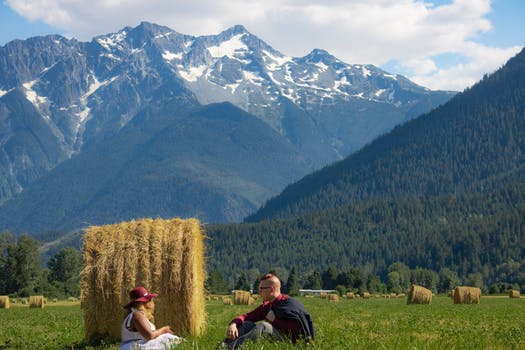

In [ ]:
rgba_image

In [ ]:
# %cd /content/drive/My Drive/Colab Notebooks/Projects/Westworld

In [ ]:
# !pwd

In [ ]:
# !cp '/content/drive/My Drive/Colab Notebooks/Projects/Westworld/Gun_Voilence' 'Gun_Voilence'

In [ ]:
import tensorflow as tf
# from keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# train_dataset = image_dataset_from_directory(directory='/content/drive/My Drive/Colab Notebooks/Projects/Kaggle-guns', 
#                                        image_size=(224, 224), 
#                                        class_mode='binary',
#                                        batch_size=32, 
#                                        validation_split = 0.2,
#                                        subset='training',
#                                        shuffle=True,
#                                        seed = 0 )

In [ ]:
# type(train_dataset)

In [ ]:
# train_dataset.take?

In [ ]:
# for images, labels in train_dataset.take(1):  # only take first element of dataset
#     numpy_images = images.numpy()
#     numpy_labels = labels.numpy()

# numpy_images.shape, numpy_labels.shape

In [ ]:
# import glob
# GV = glob.glob('/content/drive/My Drive/Colab Notebooks/Projects/Westworld/Gun_Voilence/*.*')
 
# data = []
# labels = []
 
# count = 0
 
# for i in GV:
#   img = image.load_img(i, color_mode='rgb', target_size=(224,224))
#   img = np.array(img)
#   data.append(img)
#   labels.append(0)
#   count += 1
 
# print(count)

In [ ]:
# NGV = glob.glob('/content/drive/My Drive/Colab Notebooks/Projects/Westworld/new-NGV/*.*')

# num = 0

# for i in NGV:
#   img = image.load_img(i, color_mode='rgb', target_size=(224,224))
#   img = np.array(img)
#   data.append(img)
#   labels.append(1)
#   num += 1

# print(num)

In [ ]:
# from keras.applications.vgg16 import preprocess_input

# datagen = ImageDataGenerator( 
#     preprocessing_function = preprocess_input,
#         rescale=1./255,
#         shear_range = 0.2, 
#         zoom_range = 0.2, 
#         horizontal_flip = True, 
#         brightness_range = (0.5, 1.5)) 



In [ ]:
# A test run on one image
# i = 0
# for batch in datagen.flow(
#     data[110].reshape((1,) + data[110].shape),
#     batch_size=1,
#     save_to_dir='/content/drive/My Drive/Colab Notebooks/Projects/Westworld/keras_augmentations',
#     save_prefix='Augmented_image',
#     save_format='jpg'):
#   i += 1
#   if i > 10: # create 20 augmented images
#     break  # otherwise the generator would loop indefinitely

In [ ]:
# A test run on one image
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# # Let's look at the augmented images
# aug_images = []
# for img_path in glob.glob("/content/drive/My Drive/Colab Notebooks/Projects/Westworld/keras_augmentations/*.jpg"):
#     aug_images.append(mpimg.imread(img_path))

# plt.figure(figsize=(20,10))
# columns = 5
# for i, image in enumerate(aug_images):
#     plt.subplot(len(aug_images) / columns + 1, columns, i + 1)
#     plt.imshow(image)
#     plt.axis("off")


In [ ]:
# i = 0
# for j in range(773):
#   for batch in datagen.flow(
#       data[j].reshape((1,) + data[j].shape),
#       batch_size=1,
#       save_to_dir='/content/drive/My Drive/Colab Notebooks/Projects/Westworld/keras_augmentations',
#       save_prefix='Augmented_image',
#       save_format='jpg'):
#     i += 1
#     if i >= 20: # create 20 augmented images
#       i = 0
#       break  # otherwise the generator would loop indefinitely

In [ ]:
# KA = glob.glob('/content/drive/My Drive/Colab Notebooks/Projects/Westworld/keras_augmentations/*.*')
 
# count = 0
 
# for i in KA:
#   img = image.load_img(i, color_mode='rgb', target_size=(224,224))
#   img = np.array(img)
#   data.append(img)
#   labels.append(0)
#   count += 1
 
# print(count)

In [ ]:
# data = np.array(data)
# labels = np.array(labels)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify = labels, test_size = 0.2, random_state = 42)


In [ ]:
# https://www.intechopen.com/books/recent-trends-in-computational-intelligence/classification-problem-in-imbalanced-datasets
# 0.1% undersample >> 10k in majority
# 0.5% oversample >> 5k in minority
# 1 >>> # transform = A.Compose([
#     A.HorizontalFlip(p=1.0),
#     A.RandomBrightnessContrast(p=1.0),
# ])
# 2 >>> A.RGBShift(p=0.2), A.Blur(p = 1.0)

In [ ]:
# !pip install --upgrade imbalanced-learn

In [ ]:
# import imblearn
# print(imblearn.__version__)

In [ ]:
# !pip install delayed 
# import delayed

In [ ]:
# X_train = X_train.reshape(24826,3*224*224)

In [ ]:
# from imblearn.under_sampling import CondensedNearestNeighbour
# undersample = CondensedNearestNeighbour(n_neighbors=3)

# X, y = undersample.fit_resample(X_train, y_train)

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# RandomOverSampler(sampling_strategy = 0.5)
# # from imblearn.undersample import Rand

# # undersample = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
# import os
# import shutil
# import glob
# import random

# to_be_moved = random.sample(glob.glob("/content/drive/My Drive/Colab Notebooks/Projects/Westworld/Gun_Voilence/*.jpg"), 3):

# for f in enumerate(to_be_moved, 1):
#     dest = os.path.join("C:/Users/User/Desktop", str(f[0]))
#     if not os.path.exists(dest):
#         os.makedirs(dest)
#     shutil.copy(f[1], dest)
